In [ ]:
pip install shap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from google.colab import files
uploaded = files.upload()

Saving VMD.xlsx to VMD.xlsx


In [5]:
df = pd.read_excel("VMD.xlsx")
df

,T©,P(kPa),concentration(M),Flow Rate(L/h),flux(l/m^2h)
0,319.2,5.1,1.0,50,13.5
1,319.2,5.1,1.1,50,13.4
2,319.2,5.1,1.2,50,13.2
3,319.2,5.1,1.3,50,13.2
4,319.2,5.1,1.4,50,13.1
...,...,...,...,...,...
109,310.2,4.0,2.4,100,8.3
110,310.2,4.0,2.5,100,8.1
111,310.2,4.0,2.7,100,8.0
112,310.2,4.0,2.8,100,7.9


In [ ]:
!pip install openpyxl

In [ ]:
df.columns

Index(['T©', 'P(kPa)', 'concentration(M)', 'Flow Rate(L/h)', 'flux(l/m^2h)'], dtype='object')

In [ ]:
!pip install xgboost

In [ ]:
!pip install python-docx # install python-docx module

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 17.1 MB/s eta 0:00:00


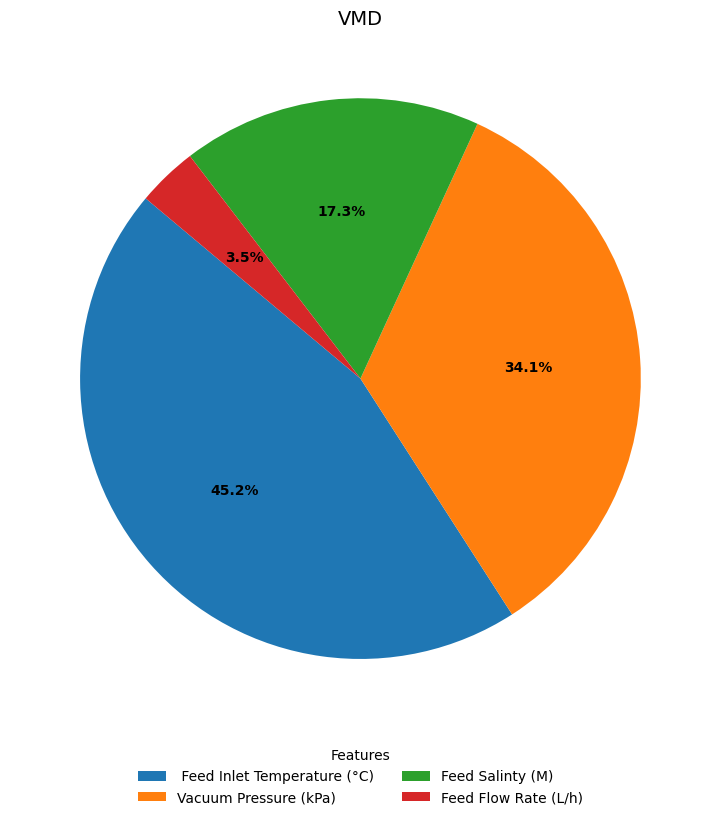

Plot saved at /content/shap_pie_chart_vmd.tiff


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import os

# DataFrame is called df
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Identify the best model
best_model = grid_search.best_estimator_

# Making predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluation using MSE and R-squared on training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)

# Use feature names from the DataFrame

feature_names = [' Feed Inlet Temperature (°C)', 'Vacuum Pressure (kPa)', 'Feed Salinty (M)', 'Feed Flow Rate (L/h)']

# Calculate mean absolute SHAP values for each feature
mean_abs_shap_values = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Define a custom set of professional colors (ensure consistency across charts)
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Cyan
]

# Ensure we don't exceed the number of colors available
colors = colors[:len(feature_names)]

# Plot the SHAP feature importance as a pie chart with legend below
fig, ax = plt.subplots(figsize=(8, 8))  # Set size to 8x8 inches

# Plot pie chart without feature names inside
wedges, texts, autotexts = ax.pie(
    mean_abs_shap_values['Mean Absolute SHAP Value'],
    labels=None,  # No labels inside the pie chart
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add a title very close to the pie chart
plt.title('VMD', fontsize=14, pad=-0.01)

# Add an external legend directly below the pie chart with minimal spacing
plt.legend(
    wedges,
    mean_abs_shap_values['Feature'],
    title="Features",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.01),  # Position the legend as close as possible below the pie chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False
)

# Set properties for better visual appeal
plt.setp(autotexts, size=10, weight="bold")  # Style for the percentage labels
plt.tight_layout(pad=0)  # Minimize padding to bring elements closer

# Save the plot as a high-resolution TIFF file in Google Colab
output_path = '/content/shap_pie_chart_vmd.tiff'  # Save path in Google Colab
plt.savefig(output_path, format='tiff', dpi=1200)

# Show the plot
plt.show()

# The plot is now saved as 'shap_pie_chart_dcmd.tiff' in Google Colab for future use
print(f"Plot saved at {output_path}")


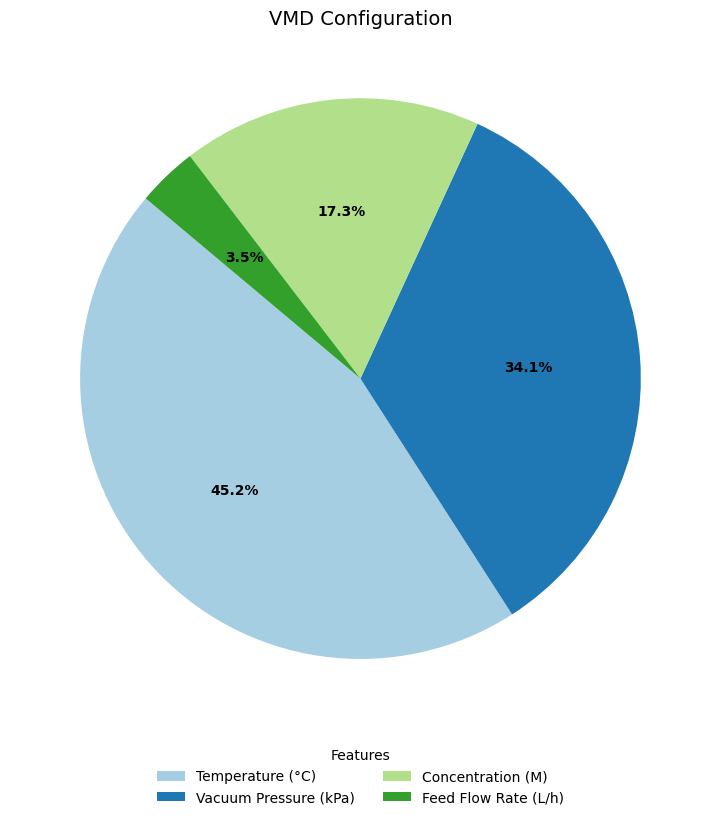

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from docx import Document


X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Identify the best model
best_model = grid_search.best_estimator_

# Making predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluation using MSE and R-squared on training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)

# Use feature names from the DataFrame
feature_names = ['Inlet Temperature (°C)', 'Vacuum Pressure (kPa)', 'Concentration (M)', 'Feed Flow Rate (L/h)']

# Calculate mean absolute SHAP values for each feature
mean_abs_shap_values = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Plot the SHAP feature importance as a pie chart with legend below
fig, ax = plt.subplots(figsize=(8, 8))

# Colors for each feature, defined to be consistent across pie charts
colors = plt.cm.Paired.colors[:len(feature_names)]  # Use color map for distinct colors

# Plot pie chart without feature names inside
wedges, texts, autotexts = ax.pie(
    mean_abs_shap_values['Mean Absolute SHAP Value'],
    labels=None,  # No labels inside the pie chart
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add a title very close to the pie chart
plt.title('VMD Configuration', fontsize=14, pad=-0.01)

# Add an external legend directly below the pie chart with minimal spacing
plt.legend(
    wedges,
    mean_abs_shap_values['Feature'],
    title="Features",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.01),  # Position the legend as close as possible below the pie chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False
)
plt.setp(autotexts, size=10, weight="bold")  # Style for the percentage labels
plt.tight_layout(pad=0)  # Minimize padding to bring elements closer

# Save the plot as a high-resolution TIFF file
plt.savefig('shap_pie_chart_vmd.tiff', format='tiff', dpi=300)
plt.show()

# Save the SHAP values to a Word document along with a brief explanation
doc = Document()

# Add a title
doc.add_heading('SHAP Analysis for VMD Configuration', level=1)

# Add the SHAP feature importance table
doc.add_heading('Mean Absolute SHAP Values', level=2)
table = doc.add_table(rows=1, cols=2)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean Absolute SHAP Value'

# Fill the table with SHAP values
for index, row in mean_abs_shap_values.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Feature']
    row_cells[1].text = f"{round(row['Mean Absolute SHAP Value'], 4)}"

# Add a brief explanation
doc.add_heading('Explanation', level=2)
doc.add_paragraph(f'The SHAP analysis shows that the most influential feature is {mean_abs_shap_values.iloc[0]["Feature"]}, '
                  f'with an average contribution of {round(mean_abs_shap_values.iloc[0]["Mean Absolute SHAP Value"], 4)} units '
                  f'to the predicted permeate flux. Other features like {mean_abs_shap_values.iloc[1]["Feature"]} and '
                  f'{mean_abs_shap_values.iloc[2]["Feature"]} also play significant roles, while features like '
                  f'{mean_abs_shap_values.iloc[-1]["Feature"]} have smaller impacts on the predictions.')
# Save the document as a Word file
doc.save('shap_analysis_vmd.docx')

# If you're using Google Colab, you can download the files
from google.colab import files
files.download('shap_pie_chart_vmd.tiff')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving DCMD.xlsx to DCMD.xlsx


In [7]:
df = pd.read_excel("DCMD.xlsx")
df

,Tc,inlet feed temprature,feed salinity,feed flow rate,coolant flow rate,flux
0,5,40,2,4.60,3.65,24.516028
1,5,50,2,4.60,3.65,37.917099
2,5,60,2,4.60,3.65,51.547111
3,5,70,2,4.60,3.65,64.267103
4,5,80,2,4.60,3.65,80.173505
...,...,...,...,...,...,...
64,25,90,2,4.65,2.90,74.484536
65,25,90,2,4.65,3.65,75.773196
66,25,90,43,2.50,2.00,51.526542
67,25,90,43,3.50,2.00,66.654482


In [ ]:
#  the target column is the last one in OUR DataFrame
new_column_names = ['Cold Permeate Temperature (°C)',
                    ' Feed Inlet Temperature (°C)',
                    'Feed Salinity (g/L)',
                    'Feed Flow Rate (L/min)',
                    'Coolant Flow Rate (L/min)',
                    'Flux (kg/m²/h)']  # Add target column name

# Rename columns
df.columns = new_column_names

df

,Cold Permeate Temperature (°C),Feed Inlet Temperature (°C),Feed Salinity (g/L),Feed Flow Rate (L/min),Coolant Flow Rate (L/min),Flux (kg/m²/h)
0,5,40,2,4.60,3.65,24.516028
1,5,50,2,4.60,3.65,37.917099
2,5,60,2,4.60,3.65,51.547111
3,5,70,2,4.60,3.65,64.267103
4,5,80,2,4.60,3.65,80.173505
...,...,...,...,...,...,...
64,25,90,2,4.65,2.90,74.484536
65,25,90,2,4.65,3.65,75.773196
66,25,90,43,2.50,2.00,51.526542
67,25,90,43,3.50,2.00,66.654482


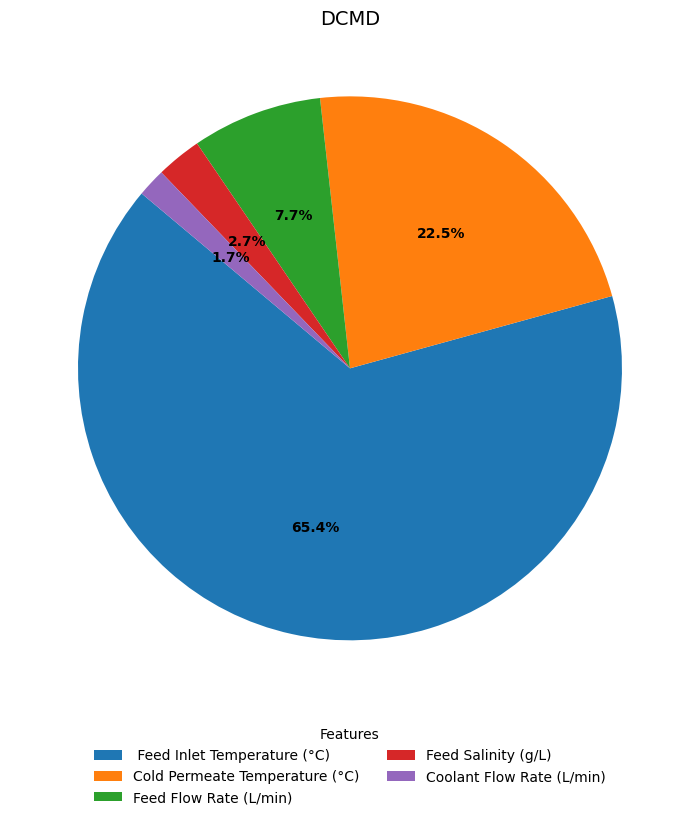

Plot saved at /content/shap_pie_chart_dcmd.tiff


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import os


X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Identify the best model
best_model = grid_search.best_estimator_

# Making predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluation using MSE and R-squared on training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)

# Use feature names from the DataFrame
feature_names = X.columns

# Calculate mean absolute SHAP values for each feature
mean_abs_shap_values = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Define a custom set of professional colors (ensure consistency across charts)
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Cyan
]

# Sort colors based on feature importance
sorted_colors = [colors[i] for i in np.argsort(-mean_abs_shap_values['Mean Absolute SHAP Value'].values)]

# Plot the SHAP feature importance as a pie chart with legend below
fig, ax = plt.subplots(figsize=(8, 8))  # Set size to 8x8 inches

# Plot pie chart without feature names inside
wedges, texts, autotexts = ax.pie(
    mean_abs_shap_values['Mean Absolute SHAP Value'],
    labels=None,  # No labels inside the pie chart
    autopct='%1.1f%%',
    startangle=140,
    colors=sorted_colors  # Use the sorted colors
)

# Add a title very close to the pie chart
plt.title('DCMD', fontsize=14, pad=-0.01)

# Add an external legend directly below the pie chart with minimal spacing
plt.legend(
    wedges,
    mean_abs_shap_values['Feature'],
    title="Features",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.01),  # Position the legend as close as possible below the pie chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False
)

# Set properties for better visual appeal
plt.setp(autotexts, size=10, weight="bold")  # Style for the percentage labels
plt.tight_layout(pad=0)  # Minimize padding to bring elements closer

# Save the plot as a high-resolution TIFF file in Google Colab
output_path = '/content/shap_pie_chart_dcmd.tiff'  # Save path in Google Colab
plt.savefig(output_path, format='tiff', dpi=1200)

# Show the plot
plt.show()

# The plot is now saved as 'shap_pie_chart_dcmd.tiff' in Google Colab for future use
print(f"Plot saved at {output_path}")





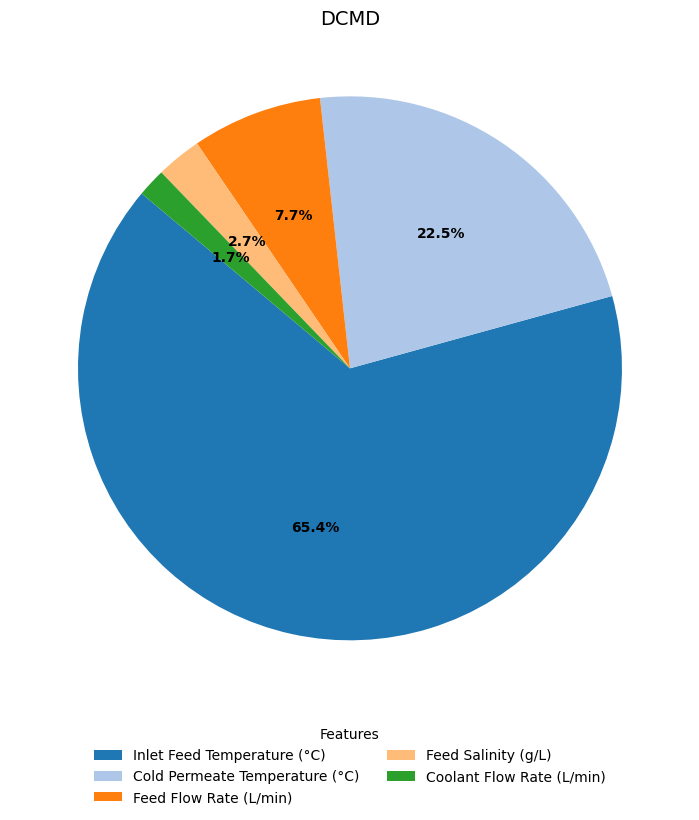

Plot saved at /content/shap_pie_chart_dcmd.tiff


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import os


X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Identify the best model
best_model = grid_search.best_estimator_

# Making predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluation using MSE and R-squared on training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)

# Use feature names from the DataFrame
feature_names = X.columns

# Calculate mean absolute SHAP values for each feature
mean_abs_shap_values = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Plot the SHAP feature importance as a pie chart with legend below
fig, ax = plt.subplots(figsize=(8, 8))  # Set size to 8x8 inches

# Professional color palette (e.g., Tab20 from matplotlib)
colors = plt.cm.tab20.colors[:len(feature_names)]  # Use Tab20 colors for a more vibrant look

# Plot pie chart without feature names inside
wedges, texts, autotexts = ax.pie(
    mean_abs_shap_values['Mean Absolute SHAP Value'],
    labels=None,  # No labels inside the pie chart
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add a title very close to the pie chart
plt.title('DCMD', fontsize=14, pad=-0.01)

# Add an external legend directly below the pie chart with minimal spacing
plt.legend(
    wedges,
    mean_abs_shap_values['Feature'],
    title="Features",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.01),  # Position the legend as close as possible below the pie chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False
)

# Set properties for better visual appeal
plt.setp(autotexts, size=10, weight="bold")  # Style for the percentage labels
plt.tight_layout(pad=0)  # Minimize padding to bring elements closer

# Save the plot as a high-resolution TIFF file in Google Colab
output_path = '/content/shap_pie_chart_dcmd.tiff'  # Save path in Google Colab
plt.savefig(output_path, format='tiff', dpi=1200)

# Show the plot
plt.show()

# The plot is now saved as 'shap_pie_chart_dcmd.tiff' in Google Colab for future use
print(f"Plot saved at {output_path}")


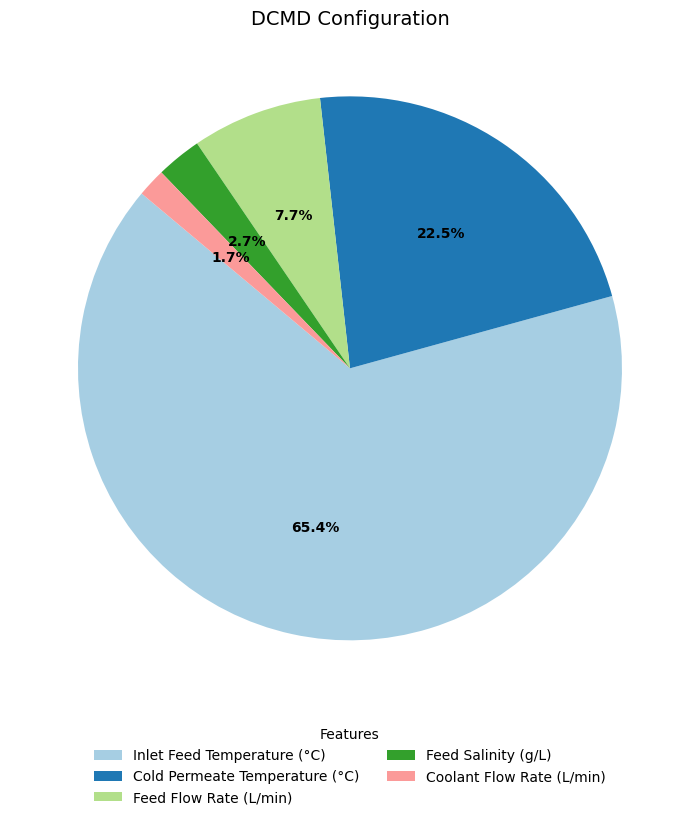

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from docx import
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Identify the best model
best_model = grid_search.best_estimator_

# Making predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluation using MSE and R-squared on training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)

# Use feature names from the DataFrame
feature_names = X.columns

# Calculate mean absolute SHAP values for each feature
mean_abs_shap_values = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Plot the SHAP feature importance as a pie chart with legend below
fig, ax = plt.subplots(figsize=(8, 8))

# Colors for each feature, defined to be consistent across pie charts
colors = plt.cm.Paired.colors[:len(feature_names)]  # Use color map for distinct colors

# Plot pie chart without feature names inside
wedges, texts, autotexts = ax.pie(
    mean_abs_shap_values['Mean Absolute SHAP Value'],
    labels=None,  # No labels inside the pie chart
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add a title very close to the pie chart
plt.title('DCMD Configuration', fontsize=14, pad=-0.01)

# Add an external legend directly below the pie chart with minimal spacing
plt.legend(
    wedges,
    mean_abs_shap_values['Feature'],
    title="Features",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.01),  # Position the legend as close as possible below the pie chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False
)
plt.setp(autotexts, size=10, weight="bold")  # Style for the percentage labels
plt.tight_layout(pad=0)  # Minimize padding to bring elements closer

# Save the plot as a high-resolution TIFF file
plt.savefig('shap_pie_chart_dcmd.tiff', format='tiff', dpi=300)
plt.show()

# Save the SHAP values to a Word document along with a brief explanation
doc = Document()

# Add a title
doc.add_heading('SHAP Analysis for DCMD Configuration', level=1)

# Add the SHAP feature importance table
doc.add_heading('Mean Absolute SHAP Values', level=2)
table = doc.add_table(rows=1, cols=2)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean Absolute SHAP Value'

# Fill the table with SHAP values
for index, row in mean_abs_shap_values.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Feature']
    row_cells[1].text = f"{round(row['Mean Absolute SHAP Value'], 4)}"

# Add a brief explanation
doc.add_heading('Explanation', level=2)
doc.add_paragraph(f'The SHAP analysis shows that the most influential feature is {mean_abs_shap_values.iloc[0]["Feature"]}, '
                  f'with an average contribution of {round(mean_abs_shap_values.iloc[0]["Mean Absolute SHAP Value"], 4)} units '
                  f'to the predicted permeate flux. Other features like {mean_abs_shap_values.iloc[1]["Feature"]} and '
                  f'{mean_abs_shap_values.iloc[2]["Feature"]} also play significant roles, while features like '
                  f'{mean_abs_shap_values.iloc[-1]["Feature"]} have smaller impacts on the predictions.')

# Save the document as a Word file
doc.save('shap_analysis_dcmd.docx')

# If you're using Google Colab, you can download the files
from google.colab import files
files.download('shap_pie_chart_dcmd.tiff')



In [ ]:
colors = plt.cm.Paired.colors[:len(feature_names)]  # Use color map for distinct colors


In [ ]:
import matplotlib.pyplot as plt

# Example number of features (replace this with your actual number of features)
num_features = len(feature_names)

# Get the colors from the 'Paired' colormap
colors = plt.cm.Paired.colors[:num_features]

# Display the colors
for color in colors:
    print(color)


(0.6509803921568628, 0.807843137254902, 0.8901960784313725)
(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)
(0.6980392156862745, 0.8745098039215686, 0.5411764705882353)
(0.2, 0.6274509803921569, 0.17254901960784313)
(0.984313725490196, 0.6039215686274509, 0.6)


In [8]:
from google.colab import files
uploaded = files.upload()

Saving AGMD.xlsx to AGMD.xlsx


In [10]:
df = pd.read_excel('AGMD.xlsx')
df

,A (mm),"Tf,in ( C)","Tc,in ( C)",Q (L/h),Y (kg/m2 h)
0,3.0,70,25.0,200,45.487
1,3.0,70,15.0,200,50.232
2,3.0,60,25.0,200,30.185
3,3.0,60,15.0,200,35.264
4,3.0,70,25.0,150,43.959
...,...,...,...,...,...
67,3.0,63,13.9,205,37.111
68,4.2,71,13.9,205,47.289
69,4.2,63,13.9,205,35.039
70,7.4,71,13.9,205,40.938


In [ ]:
df.columns = ['Air gap thickness (mm)', 'Feed Inlet Temperature (°C)', 'Condensation Temperature in (°C)', 'Feed Flow Rate (L/h)', 'Flux (kg/m² h)']

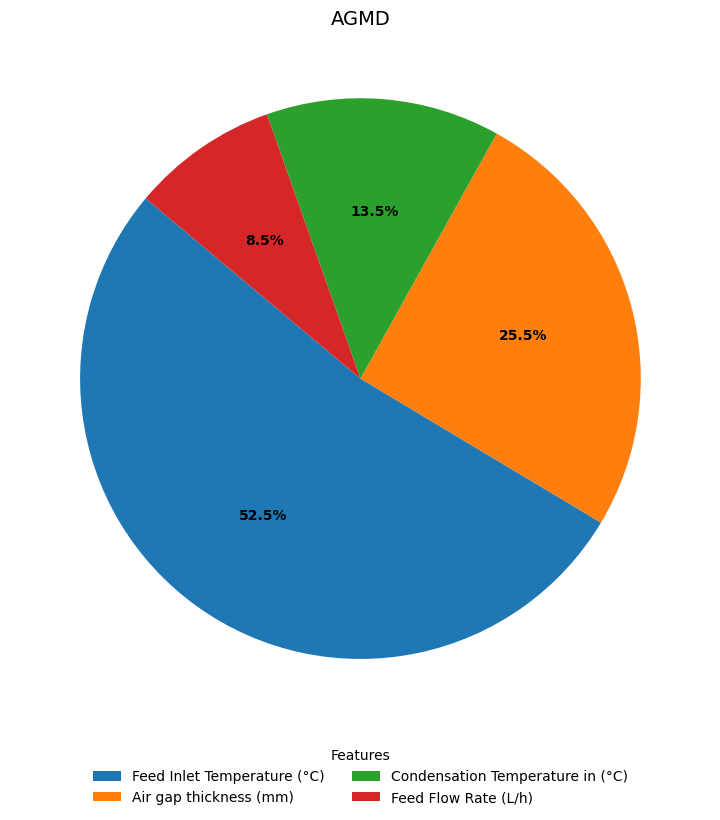

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from google.colab import files


X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Identify the best model
best_model = grid_search.best_estimator_

# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)

# Use feature names from the DataFrame
feature_names = X.columns

# Calculate mean absolute SHAP values for each feature
mean_abs_shap_values = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Define a custom set of professional colors (ensure consistency across charts)
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Cyan
]

# Sort colors based on feature importance (ensure that the most significant feature gets the most prominent color)
sorted_colors = [colors[i] for i in np.argsort(-mean_abs_shap_values['Mean Absolute SHAP Value'].values)]

# Plot the SHAP feature importance as a pie chart with legend below
fig, ax = plt.subplots(figsize=(8, 8))

# Plot pie chart without feature names inside
wedges, texts, autotexts = ax.pie(
    mean_abs_shap_values['Mean Absolute SHAP Value'],
    labels=None,  # No labels inside the pie chart
    autopct='%1.1f%%',
    startangle=140,
    colors=sorted_colors  # Use sorted colors
)

# Add a title very close to the pie chart
plt.title('AGMD', fontsize=14, pad=-0.01)

# Add an external legend directly below the pie chart with minimal spacing
plt.legend(
    wedges,
    mean_abs_shap_values['Feature'],
    title="Features",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.01),  # Position the legend as close as possible below the pie chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False
)

plt.setp(autotexts, size=10, weight="bold")  # Style for the percentage labels
plt.tight_layout(pad=0)  # Minimize padding to bring elements closer

# Save the plot as a high-resolution TIFF file
output_path = 'shap_pie_chart_agmd.tiff'
plt.savefig(output_path, format='tiff', dpi=1200)
plt.show()

# Download the plot from Google Colab



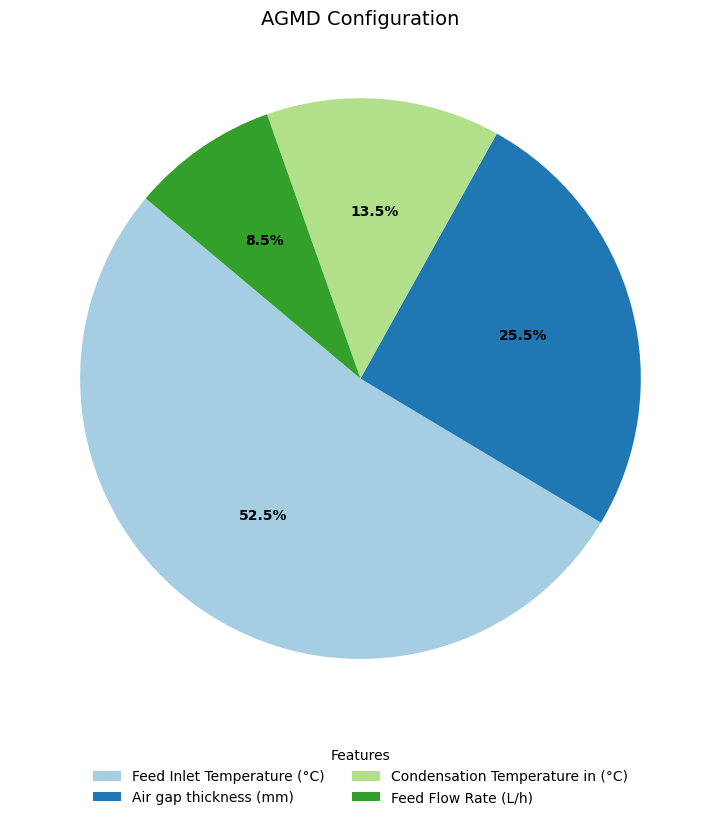

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from docx import Document


X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Identify the best model
best_model = grid_search.best_estimator_

# Making predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)

# Use feature names from the DataFrame
feature_names = X.columns

# Calculate mean absolute SHAP values for each feature
mean_abs_shap_values = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Define colors based on feature importance order for AGMD
colors = [
    (0.6509803921568628, 0.807843137254902, 0.8901960784313725),  # Light Blue (most important)
    (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),  # Blue
    (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),  # Light Green
    (0.2, 0.6274509803921569, 0.17254901960784313),  # Green
    (0.984313725490196, 0.6039215686274509, 0.6)  # Light Red
]

# Sort colors based on feature importance
sorted_colors = [colors[i] for i in np.argsort(-mean_abs_shap_values['Mean Absolute SHAP Value'].values)]

# Plot the SHAP feature importance as a pie chart with legend below
fig, ax = plt.subplots(figsize=(8, 8))

# Plot pie chart without feature names inside
wedges, texts, autotexts = ax.pie(
    mean_abs_shap_values['Mean Absolute SHAP Value'],
    labels=None,  # No labels inside the pie chart
    autopct='%1.1f%%',
    startangle=140,
    colors=sorted_colors  # Use sorted colors
)

# Add a title very close to the pie chart
plt.title('AGMD Configuration', fontsize=14, pad=-0.01)

# Add an external legend directly below the pie chart with minimal spacing
plt.legend(
    wedges,
    mean_abs_shap_values['Feature'],
    title="Features",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.01),  # Position the legend as close as possible below the pie chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False
)
plt.setp(autotexts, size=10, weight="bold")  # Style for the percentage labels
plt.tight_layout(pad=0)  # Minimize padding to bring elements closer

# Save the plot as a high-resolution TIFF file
plt.savefig('shap_pie_chart_agmd.tiff', format='tiff', dpi=300)
plt.show()

# Save the SHAP values to a Word document along with a brief explanation
doc = Document()

# Add a title
doc.add_heading('SHAP Analysis for AGMD Configuration', level=1)

# Add the SHAP feature importance table
doc.add_heading('Mean Absolute SHAP Values', level=2)
table = doc.add_table(rows=1, cols=2)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean Absolute SHAP Value'

# Fill the table with SHAP values
for index, row in mean_abs_shap_values.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Feature']
    row_cells[1].text = f"{round(row['Mean Absolute SHAP Value'], 4)}"

# Add a brief explanation
doc.add_heading('Explanation', level=2)
doc.add_paragraph(f'The SHAP analysis shows that the most influential feature is {mean_abs_shap_values.iloc[0]["Feature"]}, '
                  f'with an average contribution of {round(mean_abs_shap_values.iloc[0]["Mean Absolute SHAP Value"], 4)} units '
                  f'to the predicted permeate flux. Other features like {mean_abs_shap_values.iloc[1]["Feature"]} and '
                  f'{mean_abs_shap_values.iloc[2]["Feature"]} also play significant roles, while features like '
                  f'{mean_abs_shap_values.iloc[-1]["Feature"]} have smaller impacts on the predictions.')

# Save the document as a Word file
doc.save('shap_analysis_agmd.docx')

# If you're using Google Colab, you can download the files
from google.colab import files
files.download('shap_pie_chart_agmd.tiff')


In [11]:
from google.colab import files
uploaded = files.upload()

Saving SGMD.xlsx to SGMD.xlsx


In [12]:
df = pd.read_excel("SGMD.xlsx")
df

,Trial,Type,"Tf,in (°C)",Ua (m/s),Uw (m/s),J (kg m−2 h−1)
0,1,Training,68,1.932,0.200,3.9816
1,2,Training,54,1.932,0.200,2.2896
2,3,Training,68,0.966,0.200,2.3400
3,4,Training,54,0.966,0.200,1.6524
4,5,Training,68,1.932,0.140,3.4884
5,6,Training,54,1.932,0.140,2.6640
6,7,Training,68,0.966,0.140,2.0952
7,8,Training,54,0.966,0.140,1.1736
8,9,Training,70,1.449,0.170,3.6576
9,10,Training,52,1.449,0.170,1.7964


In [ ]:
# Renaming columns in the DataFrame
df.rename(columns={
    'Tf,in (°C)': 'Temperature of Feed (°C)',
    'Ua (m/s)': 'Air Flow Rate (L/h)',
    'Uw (m/s)': 'Feed Flow Rate (L/h)',
    'J (kg m−2 h−1)': 'Flux (kg m−2 h−1)'  # Rename J to Flux
}, inplace=True)

# Display the updated DataFrame columns
print(df.columns)

Index(['Trial ', 'Type', 'Temperature of Feed (°C)', 'Air Flow Rate (L/h)',
       'Feed Flow Rate (L/h)', 'Flux (kg m−2 h−1)'],
      dtype='object')


In [ ]:
df

,Trial,Type,Temperature of Feed (°C),Air Flow Rate (L/h),Feed Flow Rate (L/h),Flux (kg m−2 h−1)
0,1,Training,68,1.932,0.200,3.9816
1,2,Training,54,1.932,0.200,2.2896
2,3,Training,68,0.966,0.200,2.3400
3,4,Training,54,0.966,0.200,1.6524
4,5,Training,68,1.932,0.140,3.4884
5,6,Training,54,1.932,0.140,2.6640
6,7,Training,68,0.966,0.140,2.0952
7,8,Training,54,0.966,0.140,1.1736
8,9,Training,70,1.449,0.170,3.6576
9,10,Training,52,1.449,0.170,1.7964


In [ ]:
# Drop the first and second columns in place
df.drop(df.columns[[0, 1]], axis=1, inplace=True)


In [ ]:
df

,Temperature of Feed (°C),Air Flow Rate (L/h),Feed Flow Rate (L/h),Flux (kg m−2 h−1)
0,68,1.932,0.200,3.9816
1,54,1.932,0.200,2.2896
2,68,0.966,0.200,2.3400
3,54,0.966,0.200,1.6524
4,68,1.932,0.140,3.4884
5,54,1.932,0.140,2.6640
6,68,0.966,0.140,2.0952
7,54,0.966,0.140,1.1736
8,70,1.449,0.170,3.6576
9,52,1.449,0.170,1.7964


X shape: (53, 3)
y shape: (53,)
Training Mean Squared Error (MSE): 0.000
Training R-squared (R²): 1.000
Test Mean Squared Error (MSE): 0.149
Test R-squared (R²): 0.588


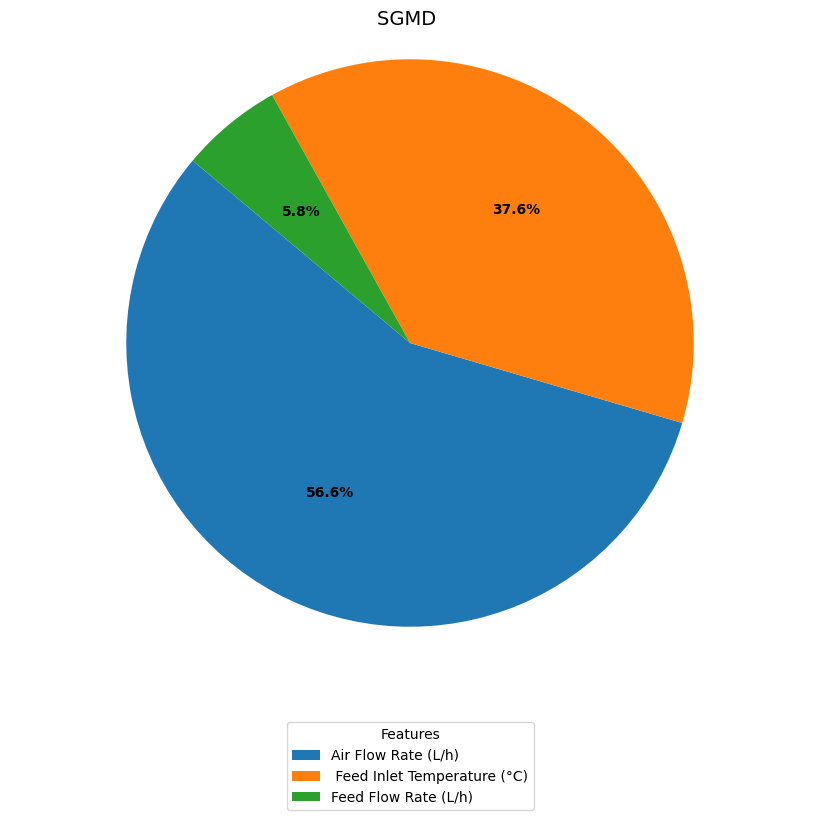

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from docx import Document


# Renaming columns as per your requirements
df.columns = [' Feed Inlet Temperature (°C)', 'Air Flow Rate (L/h)', 'Feed Flow Rate (L/h)', 'Flux (kg m−2 h−1)']

# Create features (X) and target (y)
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Print shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Training the model
xgb_model.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluation using MSE and R-squared on training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Training Mean Squared Error (MSE): {train_mse:.3f}")
print(f"Training R-squared (R²): {train_r2:.3f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.3f}")
print(f"Test R-squared (R²): {test_r2:.3f}")

# SHAP analysis
explainer = shap.Explainer(xgb_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Calculate mean absolute SHAP values for feature importance
mean_abs_shap_values = pd.DataFrame({
    'Feature': X.columns,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Define colors based on your specified order (same as before)
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Cyan
]

# Sort colors based on feature importance
sorted_colors = [colors[i] for i in np.argsort(-mean_abs_shap_values['Mean Absolute SHAP Value'].values)]

# Plot the SHAP pie chart without labels around the pie
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(mean_abs_shap_values['Mean Absolute SHAP Value'],
                                    autopct='%1.1f%%', startangle=140, colors=sorted_colors[:len(mean_abs_shap_values)], labels=None)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the title above the pie chart
plt.title('SGMD ', fontsize=14)

# Add a legend below the pie chart
plt.legend(mean_abs_shap_values['Feature'], title='Features', bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize=10)

# Style for the percentage labels
plt.setp(autotexts, size=10, weight="bold")

# Minimize padding to bring elements closer
plt.tight_layout(pad=0)

# Save the plot as a high-resolution TIFF file
output_path = '/content/shap_pie_chart_sgmd.tiff'  # Save path in Google Colab
plt.savefig(output_path, dpi=1200)
plt.show()

# Save the SHAP values to a Word document along with a brief explanation
doc = Document()

# Add a title
doc.add_heading('SHAP Analysis for SGMD Configuration', level=1)

# Add the SHAP feature importance table
doc.add_heading('Mean Absolute SHAP Values', level=2)
table = doc.add_table(rows=1, cols=2)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean Absolute SHAP Value'

# Fill the table with SHAP values
for index, row in mean_abs_shap_values.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Feature']
    row_cells[1].text = str(round(row['Mean Absolute SHAP Value'], 4))

# Add a brief explanation
doc.add_heading('Explanation', level=2)
doc.add_paragraph(f'The SHAP analysis shows that the most influential feature is {mean_abs_shap_values.iloc[0]["Feature"]}, '
                  f'with an average contribution of {round(mean_abs_shap_values.iloc[0]["Mean Absolute SHAP Value"], 4)} units '
                  f'to the predicted permeate flux. Other features like {mean_abs_shap_values.iloc[1]["Feature"]} and '
                  f'{mean_abs_shap_values.iloc[2]["Feature"]} also play significant roles, while features like '
                  f'{mean_abs_shap_values.iloc[-1]["Feature"]} have smaller impacts on the predictions.')

# Save the document as a Word file
doc.save('/content/shap_analysis_sgmd.docx')




X shape: (53, 3)
y shape: (53,)
Training Mean Squared Error (MSE): 0.000
Training R-squared (R²): 1.000
Test Mean Squared Error (MSE): 0.149
Test R-squared (R²): 0.588


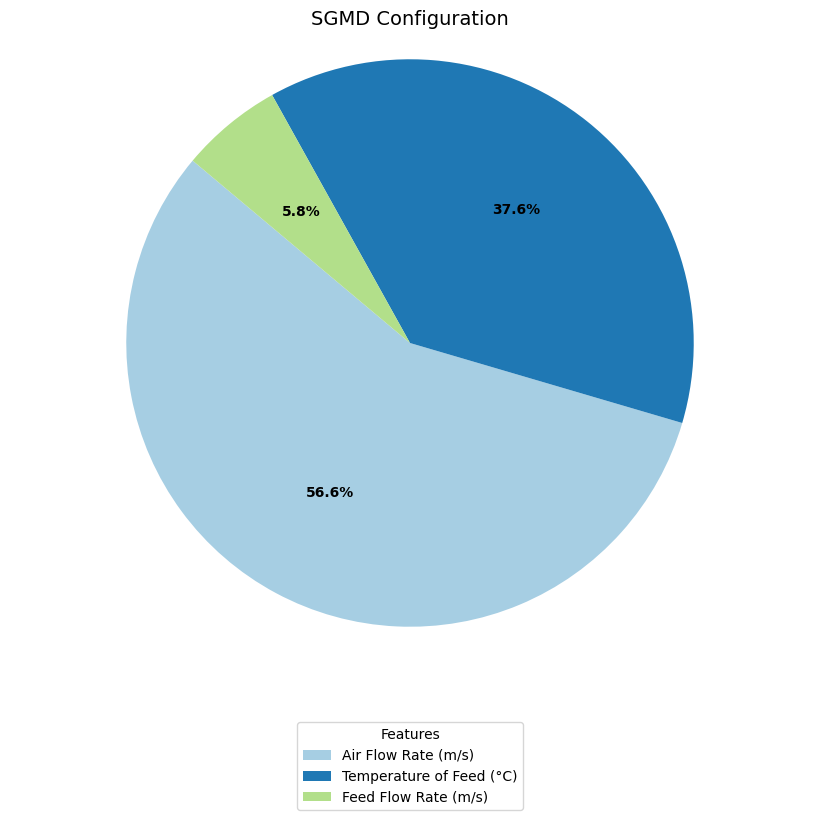

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from docx import Document

# Assuming your DataFrame is called df
# Renaming columns as per your requirements
df.columns = ['Temperature of Feed (°C)', 'Air Flow Rate (m/s)', 'Feed Flow Rate (m/s)', 'Flux (kg m−2 h−1)']

# Create features (X) and target (y)
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Print shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Training the model
xgb_model.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluation using MSE and R-squared on training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Training Mean Squared Error (MSE): {train_mse:.3f}")
print(f"Training R-squared (R²): {train_r2:.3f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.3f}")
print(f"Test R-squared (R²): {test_r2:.3f}")

# SHAP analysis
explainer = shap.Explainer(xgb_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Calculate mean absolute SHAP values for feature importance
mean_abs_shap_values = pd.DataFrame({
    'Feature': X.columns,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Define colors based on your specified order
colors = [
    (0.6509803921568628, 0.807843137254902, 0.8901960784313725),  # Light blue
    (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),  # Blue
    (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),  # Light green
    (0.2, 0.6274509803921569, 0.17254901960784313),  # Green
    (0.984313725490196, 0.6039215686274509, 0.6)   # Light red
]

# Plot the SHAP pie chart without labels around the pie
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(mean_abs_shap_values['Mean Absolute SHAP Value'],
                                    autopct='%1.1f%%', startangle=140, colors=colors[:len(mean_abs_shap_values)], labels=None)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the title above the pie chart
plt.title('SGMD Configuration', fontsize=14)

# Add a legend below the pie chart
plt.legend(mean_abs_shap_values['Feature'], title='Features', bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize=10)

# Style for the percentage labels
plt.setp(autotexts, size=10, weight="bold")

# Minimize padding to bring elements closer
plt.tight_layout(pad=0)

# Save the plot as a high-resolution TIFF file
plt.savefig('shap_pie_chart_sgmd.tiff', dpi=300)
plt.show()

# Save the SHAP values to a Word document along with a brief explanation
doc = Document()

# Add a title
doc.add_heading('SHAP Analysis for SGMD Configuration', level=1)

# Add the SHAP feature importance table
doc.add_heading('Mean Absolute SHAP Values', level=2)
table = doc.add_table(rows=1, cols=2)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean Absolute SHAP Value'

# Fill the table with SHAP values
for index, row in mean_abs_shap_values.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Feature']
    row_cells[1].text = str(round(row['Mean Absolute SHAP Value'], 4))

# Add a brief explanation
doc.add_heading('Explanation', level=2)
doc.add_paragraph(f'The SHAP analysis shows that the most influential feature is {mean_abs_shap_values.iloc[0]["Feature"]}, '
                  f'with an average contribution of {round(mean_abs_shap_values.iloc[0]["Mean Absolute SHAP Value"], 4)} units '
                  f'to the predicted permeate flux. Other features like {mean_abs_shap_values.iloc[1]["Feature"]} and '
                  f'{mean_abs_shap_values.iloc[2]["Feature"]} also play significant roles, while features like '
                  f'{mean_abs_shap_values.iloc[-1]["Feature"]} have smaller impacts on the predictions.')

# Save the document as a Word file
doc.save('shap_analysis_sgmd.docx')

# If you're using Google Colab, you can download the files
from google.colab import files
files.download('shap_pie_chart_sgmd.tiff')
files.download('shap_analysis_sgmd.docx')


X shape: (53, 3)
y shape: (53,)
Training Mean Squared Error (MSE): 0.000
Training R-squared (R²): 1.000
Test Mean Squared Error (MSE): 0.149
Test R-squared (R²): 0.588


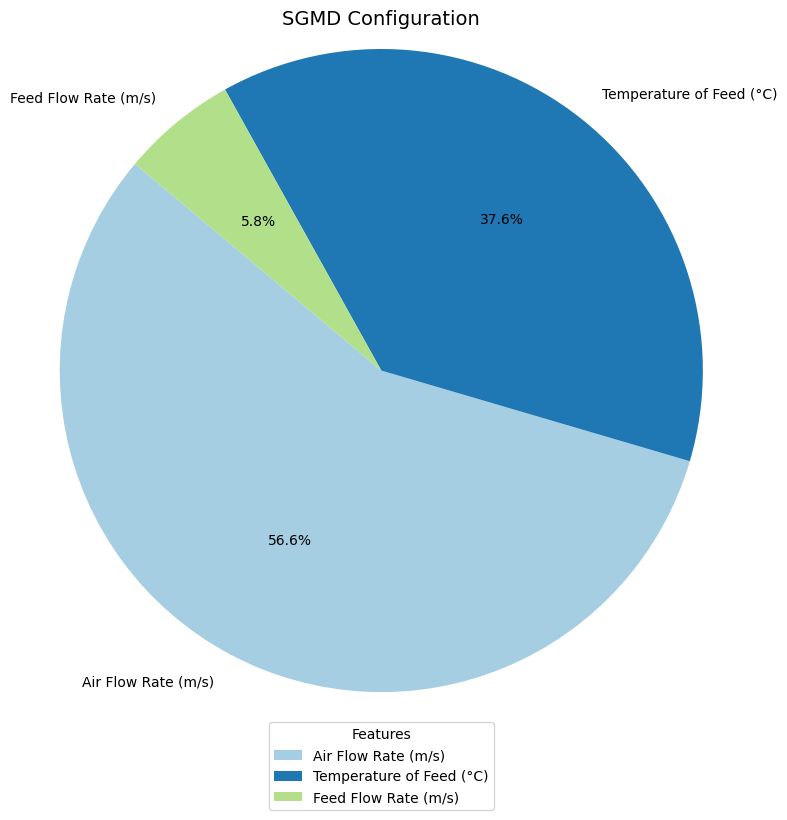

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from docx import Document

# Renaming columns as per your requirements
df.columns = ['Temperature of Feed (°C)', 'Air Flow Rate (m/s)', 'Feed Flow Rate (m/s)', 'Flux (kg m−2 h−1)']

# Create features (X) and target (y)
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

# Print shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the XGBoost model with initial parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Training the model
xgb_model.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluation using MSE and R-squared on training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Training Mean Squared Error (MSE): {train_mse:.3f}")
print(f"Training R-squared (R²): {train_r2:.3f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.3f}")
print(f"Test R-squared (R²): {test_r2:.3f}")

# SHAP analysis
explainer = shap.Explainer(xgb_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Calculate mean absolute SHAP values for feature importance
mean_abs_shap_values = pd.DataFrame({
    'Feature': X.columns,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Define colors based on your specified order
colors = [
    (0.6509803921568628, 0.807843137254902, 0.8901960784313725),  # Light blue
    (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),  # Blue
    (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),  # Light green
    (0.2, 0.6274509803921569, 0.17254901960784313),  # Green
    (0.984313725490196, 0.6039215686274509, 0.6)   # Light red
]

# Plot the SHAP pie chart with the specified colors
plt.figure(figsize=(8, 8))
plt.pie(mean_abs_shap_values['Mean Absolute SHAP Value'], labels=mean_abs_shap_values['Feature'],
        autopct='%1.1f%%', startangle=140, colors=colors[:len(mean_abs_shap_values)])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the title above the pie chart
plt.title('SGMD Configuration', fontsize=14)

# Add a legend below the pie chart
plt.legend(mean_abs_shap_values['Feature'], title='Features', bbox_to_anchor=(0.5, -0.01), loc='upper center', fontsize=10)
plt.setp(autotexts, size=10, weight="bold")  # Style for the percentage labels
plt.tight_layout(pad=0)  # Minimize padding to bring elements closer
# Save the plot as a high-resolution TIFF file
plt.savefig('shap_pie_chart_sgmd.tiff', dpi=300)
plt.show()

# Save the SHAP values to a Word document along with a brief explanation
doc = Document()

# Add a title
doc.add_heading('SHAP Analysis for SGMD Configuration', level=1)

# Add the SHAP feature importance table
doc.add_heading('Mean Absolute SHAP Values', level=2)
table = doc.add_table(rows=1, cols=2)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean Absolute SHAP Value'

# Fill the table with SHAP values
for index, row in mean_abs_shap_values.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Feature']
    row_cells[1].text = str(round(row['Mean Absolute SHAP Value'], 4))

# Add a brief explanation
doc.add_heading('Explanation', level=2)
doc.add_paragraph(f'The SHAP analysis shows that the most influential feature is {mean_abs_shap_values.iloc[0]["Feature"]}, '
                  f'with an average contribution of {round(mean_abs_shap_values.iloc[0]["Mean Absolute SHAP Value"], 4)} units '
                  f'to the predicted permeate flux. Other features like {mean_abs_shap_values.iloc[1]["Feature"]} and '
                  f'{mean_abs_shap_values.iloc[2]["Feature"]} also play significant roles, while features like '
                  f'{mean_abs_shap_values.iloc[-1]["Feature"]} have smaller impacts on the predictions.')

# Save the document as a Word file
doc.save('shap_analysis_sgmd.docx')

# If you're using Google Colab, you can download the files
from google.colab import files
files.download('shap_pie_chart_sgmd.tiff')



In [ ]:
# If you're using Google Colab, you can download the files
from google.colab import files
files.download('shap_pie_chart_sgmd.tiff')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

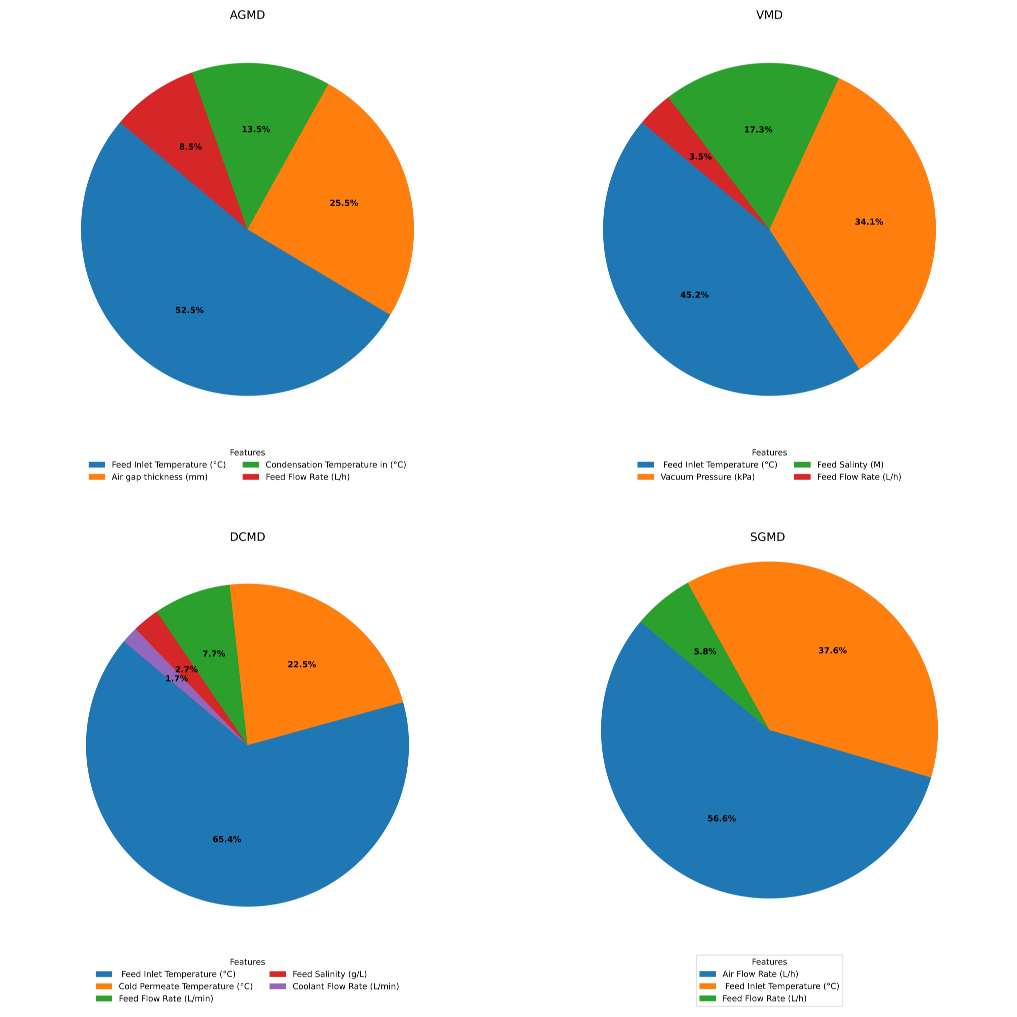

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# File names of the saved images
file_names = [
    '/content/shap_pie_chart_agmd.tiff',
    '/content/shap_pie_chart_vmd.tiff',
    '/content/shap_pie_chart_dcmd.tiff',
    '/content/shap_pie_chart_sgmd.tiff'
]

# Create a 2x2 grid for the pie charts
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop through the files and plot each one
for ax, file_name in zip(axs.flatten(), file_names):
    img = mpimg.imread(file_name)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Adjust layout to minimize space between plots
plt.tight_layout(pad=0.1)  # Minimize padding between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Minimal spacing between subplots

# Save the combined figure as a high-resolution TIFF file with 1200 DPI
output_path = '/content/shap_combined_pie_charts_high_quality.tiff'
plt.savefig(output_path, format='tiff', dpi=1200)
plt.show()

# Download the high-quality file
from google.colab import files
files.download(output_path)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (92160000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


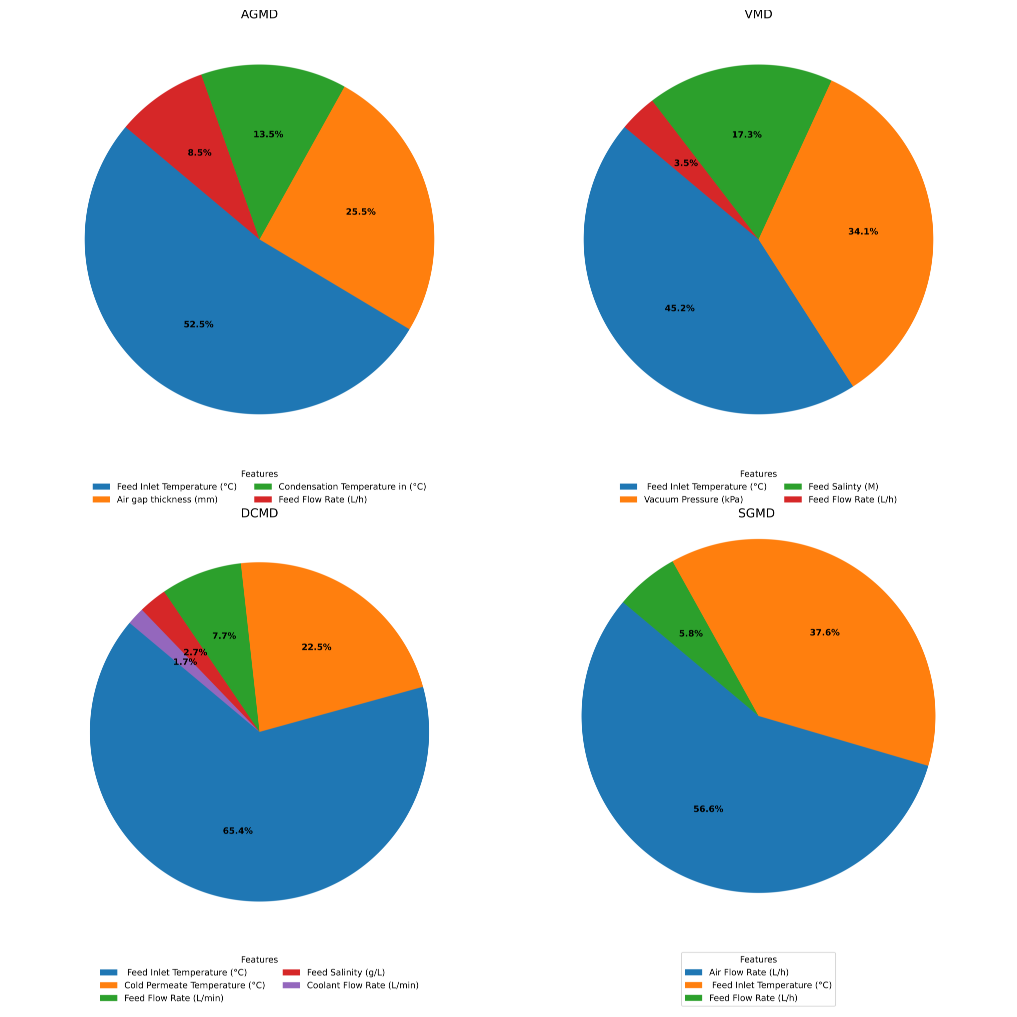

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# File names of the saved images
file_names = [

    '/content/shap_pie_chart_agmd.tiff',
   '/content/shap_pie_chart_vmd.tiff',
    '/content/shap_pie_chart_dcmd.tiff',
    '/content/shap_pie_chart_sgmd.tiff'
]

# Create a 2x2 grid for the pie charts
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop through the files and plot each one
for ax, file_name in zip(axs.flatten(), file_names):
    img = mpimg.imread(file_name)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Adjust layout to minimize space between plots
plt.tight_layout(pad=0.1)  # Minimize padding between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Remove space between subplots


plt.show()




In [ ]:

from google.colab import files

# Upload files
uploaded = files.upload()

# Check the names of uploaded files
print("Uploaded files:", uploaded.keys())


Saving shap_pie_chart_sgmd (1).tiff to shap_pie_chart_sgmd (1).tiff
Saving shap_pie_chart_agmd (3).tiff to shap_pie_chart_agmd (3).tiff
Saving shap_pie_chart_dcmd.tiff to shap_pie_chart_dcmd.tiff
Saving shap_pie_chart_vmd.tiff to shap_pie_chart_vmd.tiff
Uploaded files: dict_keys(['shap_pie_chart_sgmd (1).tiff', 'shap_pie_chart_agmd (3).tiff', 'shap_pie_chart_dcmd.tiff', 'shap_pie_chart_vmd.tiff'])


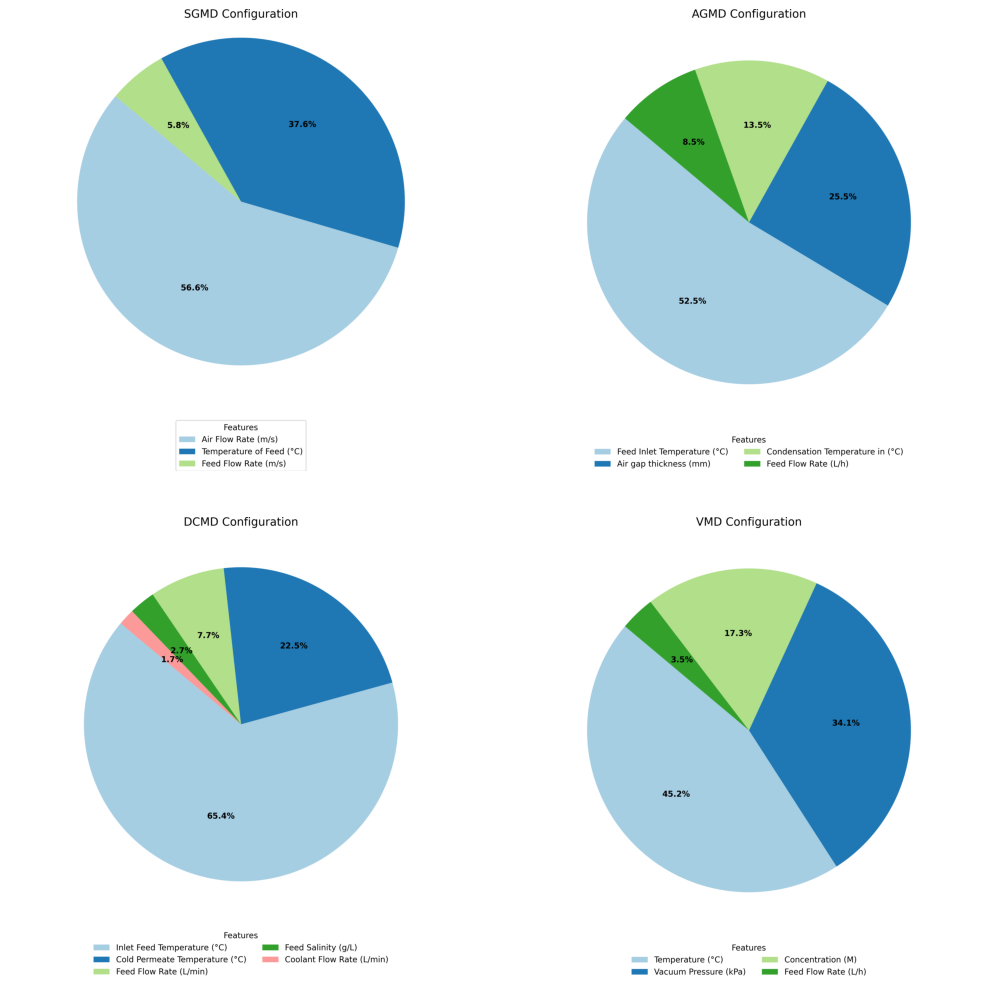

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the file names
file_names = [
    'shap_pie_chart_sgmd (1).tiff',
    'shap_pie_chart_agmd (3).tiff',
    'shap_pie_chart_dcmd.tiff',
    'shap_pie_chart_vmd.tiff'
]

# Create a 2x2 grid for the pie charts
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop through the files and plot each one
for ax, file_name in zip(axs.flatten(), file_names):
    img = mpimg.imread(file_name)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing between subplots

# Save the combined figure
plt.savefig('shap_combined_pie_charts.tiff', dpi=300)
plt.show()


In [ ]:
from google.colab import files

# Download the saved combined pie charts image
files.download('shap_combined_pie_charts.tiff')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>